# Analyse et pré-traitement des articles récupérés via NewsAPI pour tester les performances du modèle LSTM entraîné dans Training.ipynb

On utilise l'API **NewsAPI** pour récupérer les articles de presse en rapport avec Apple. On se concentrera sur le site Forbes qui rédige des articles intéressants pour notre projet puisqu'ils donnent souvent des informations pertinentes sur la santé financière des entreprises.
On se restreint aux articles dont le titre contient "Apple" afin de se concentrer seulement sur des articles qui ciblent réellement l'entreprise.

In [2]:
#On récupère les articles et on en extrait les informations les plus importantes pour veiller au bon déroulement de la requête
import requests
parameters = {
    'q': 'Apple',
    'domains': 'forbes.com',
    'sortBy': 'publishedAt',
    'apiKey': '1b20fb6f9b9d40f0b4e4ad6fe5d90755' 
}

url = 'https://newsapi.org/v2/everything'

#Appel de l'API
response = requests.get(url, params=parameters)
articles = response.json().get('articles', []) 

for article in articles:
    title = article.get('title', 'Titre indisponible')  
    source_name = article.get('source', {}).get('name', 'Source indisponible')
    url = article.get('url', 'URL indisponible')
    print(f"Titre: {title}\nSource: {source_name}\nURL: {url}\n")


/Users/dabadieraphael/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Titre: Shares Of Chip Designer Arm Hit New All-Time High—Outclassing 2023 IPO Peers
Source: Forbes
URL: https://www.forbes.com/sites/dereksaul/2023/12/26/shares-of-chip-designer-arm-hit-new-all-time-high-outclassing-2023-ipo-peers/

Titre: The 2024 Dining And Drinking Guide To Nova Scotia
Source: Forbes
URL: https://www.forbes.com/sites/katiebell/2023/12/26/the--2024-dining-and-drinking-guide-to-nova-scotia/

Titre: Apple Appeals As Watch Series 9 And Ultra 2 Sales Banned
Source: Forbes
URL: https://www.forbes.com/sites/andrewwilliams/2023/12/26/apple-appeals-as-watch-series-9-and-ultra-2-sales-banned/

Titre: Buffett’s Longer-Term Slump: Time To Rethink Value Investing?
Source: Forbes
URL: https://www.forbes.com/sites/jimosman/2023/12/26/buffetts-longer-term-slump-time-to-rethink-value-investing/

Titre: 2023 In Review: Stock Market Resilience And The Rise Of The Magnificent Seven
Source: Forbes
URL: https://www.forbes.com/sites/greatspeculations/2023/12/26/2023-in-review-stock-market

On enregistre les articles récupérés dans un CSV avant de les convertir en un dataframe.

In [3]:
import csv

with open('articles.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Titre', 'URL', 'Date de publication', 'Description','Source'])
    for article in articles:
        if "Apple" not in article['title']:
          continue
        writer.writerow([article['title'], article['url'], article['publishedAt'], article['description'], article['source']['name']])

       



# Récupération du contenu des articles

In [4]:
import pandas as pd

df=pd.read_csv('articles.csv')
df

,Titre,URL,Date de publication,Description,Source
0,Apple Appeals As Watch Series 9 And Ultra 2 Sa...,https://www.forbes.com/sites/andrewwilliams/20...,2023-12-26T17:45:03Z,Apple has launched an appeal to get its Watch ...,Forbes
1,Apple Watch Import Ban Starts Today—Here’s Wha...,https://www.forbes.com/sites/jamesfarrell/2023...,2023-12-26T17:09:29Z,Imports and sales of Apple Watches with blood ...,Forbes
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-25T21:26:53Z,The next big iOS update is on its way and incl...,Forbes
3,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-24T15:29:03Z,Apple faces a crucial decision about the next-...,Forbes
4,Setting Up A New Apple iPhone: The 7 Things Yo...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24T11:00:39Z,"So, you’ve just snagged a new iPhone? Congrats...",Forbes
5,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24T10:25:07Z,The next big iOS update is on its way and incl...,Forbes
6,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-23T22:28:24Z,Apple faces a crucial decision about the next-...,Forbes
7,iOS 17.3: Apple Is About To Launch An Awesome ...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-23T11:00:02Z,The next big iOS update is on its way and incl...,Forbes
8,iOS 17.2.1: Apple Suddenly Releases Unexpected...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-23T09:15:36Z,If you thought the next Apple update would be ...,Forbes
9,"Apple Loop: iPhone 16 Pro AI Secrets, Snapdrag...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-22T22:34:51Z,This week’s Apple headlines; leaked iPhone det...,Forbes


On crée la colonne 'Contenu' dans laquelle on récupère la page html correspondant à l'URL de l'article.

In [5]:
urls = [url for url in df['URL']]
html_contents = []
compteur=0
df['Contenu']=[None] * len(df)

for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        html_contents.append(response.text)
        df['Contenu'].loc[compteur]=response.text
    else:
        print(f"Échec de récupération pour {url}")
    compteur+=1

df.head()

,Titre,URL,Date de publication,Description,Source,Contenu
0,Apple Appeals As Watch Series 9 And Ultra 2 Sa...,https://www.forbes.com/sites/andrewwilliams/20...,2023-12-26T17:45:03Z,Apple has launched an appeal to get its Watch ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
1,Apple Watch Import Ban Starts Today—Here’s Wha...,https://www.forbes.com/sites/jamesfarrell/2023...,2023-12-26T17:09:29Z,Imports and sales of Apple Watches with blood ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-25T21:26:53Z,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
3,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-24T15:29:03Z,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
4,Setting Up A New Apple iPhone: The 7 Things Yo...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24T11:00:39Z,"So, you’ve just snagged a new iPhone? Congrats...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."


In [6]:
#Transformation de la colonne Date de publication en DateTime

df['Date de publication']=pd.to_datetime(df['Date de publication'])


## Premières analyses descriptives

Comparaison de la taille des différents titres / descriptions / contenus

In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


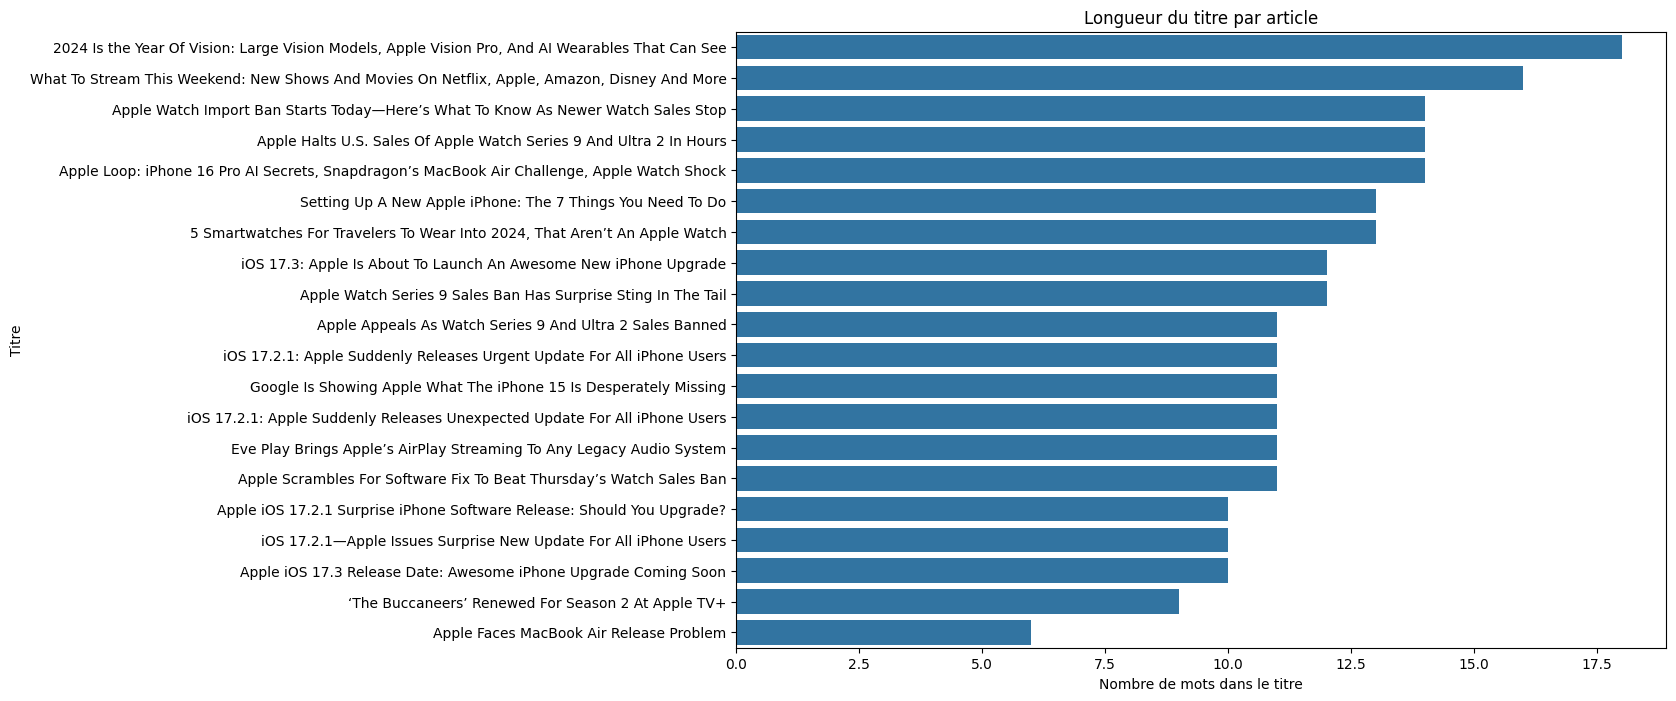

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Title_length']=df['Titre'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Title_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Title_length', y='Titre', data=df_sorted_by_title, orient='h')

plt.xlabel('Nombre de mots dans le titre')
plt.ylabel('Titre')
plt.title('Longueur du titre par article')
plt.show()

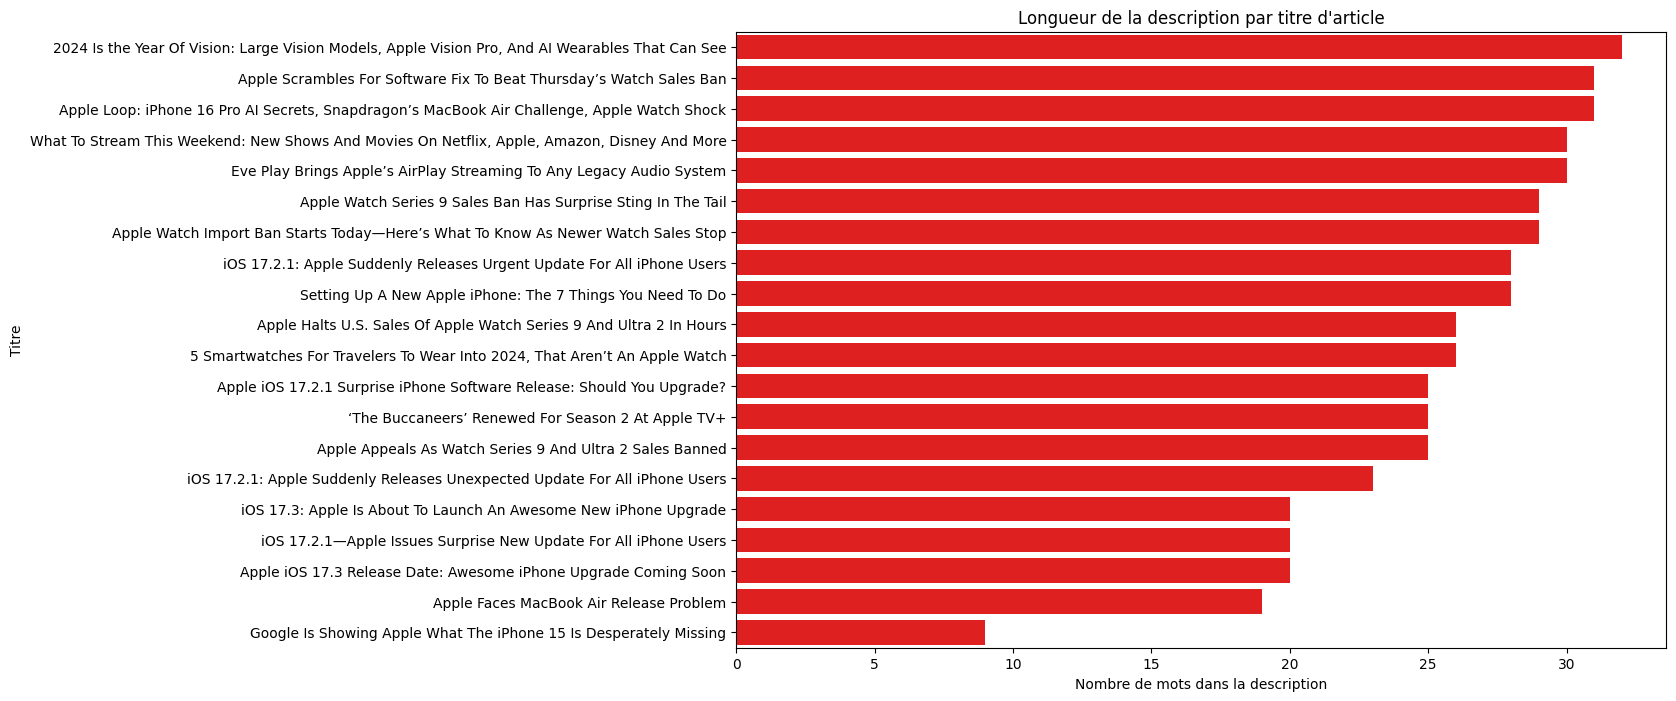

In [9]:
df['Description_length']=df['Description'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Description_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Description_length', y='Titre', data=df_sorted_by_title, orient='h', color='red')

plt.xlabel('Nombre de mots dans la description')
plt.ylabel('Titre')
plt.title('Longueur de la description par titre d\'article')
plt.show()

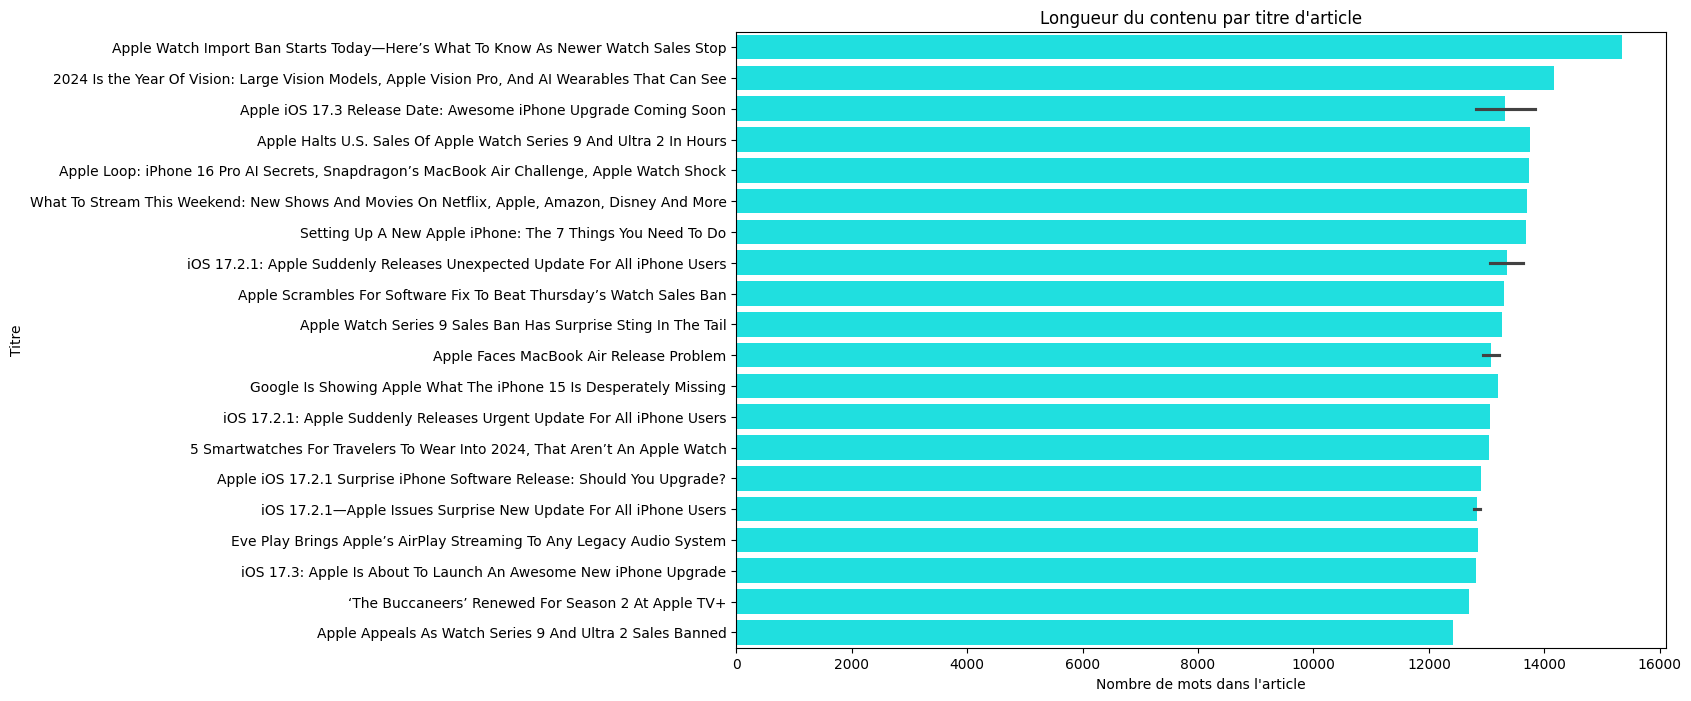

In [10]:
df['Content_length']=df['Contenu'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Content_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Content_length', y='Titre', data=df_sorted_by_title, orient='h', color='cyan')

plt.xlabel("Nombre de mots dans l'article")
plt.ylabel('Titre')
plt.title('Longueur du contenu par titre d\'article')
plt.show()

Comparaison des articles récoltés entre eux selon ces trois dimensions sous forme d'un bubble chart : l'axe X correspond à la longueur du titre, l'axe Y à la longueur de la description et la taille de la bulle représentera la longueur du contenu de l'article.

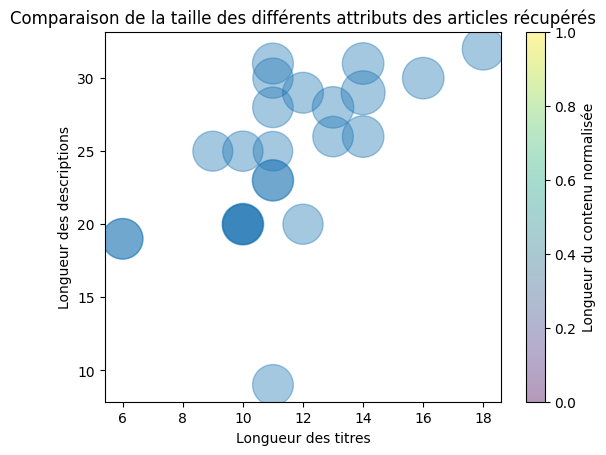

In [11]:

import matplotlib.pyplot as plt

bubble_size=df['Content_length']/df['Content_length'].max()*1000 #Normalisation de la taille des bulles à des valeurs proches de celles obtenues pour les tailles de titre et de description

plt.scatter(x=df['Title_length'], y=df['Description_length'],s=bubble_size,alpha=0.4)
plt.xlabel('Longueur des titres')
plt.ylabel('Longueur des descriptions')
plt.title('Comparaison de la taille des différents attributs des articles récupérés')
plt.colorbar(label='Longueur du contenu normalisée')
plt.show()

Il semble y avoir une concentration de bulles au centre du graphique, indiquant ainsi une certaine homogénéité dans la répartition de la taille des descriptions et des titres des articles.
Toutefois, on ne peut pas affirmer l'existence d'une corrélation directe entre la longueur des titres et la longueur des descriptions. De même, la longueur normalisée du contenu des articles laisse penser que les tailles des descriptions et des titres n'influent pas sur la taille de l'article en lui-même.

# Préparation du texte en vue de l'analyse de sentiments (Nettoyage et analyse des titres et descriptions)

**Nettoyage du texte**

On crée des fonctions importantes pour la suite dans les phases de nettoyage du texte et d'analyse du contenu des articles.

In [12]:
#Fonctions importantes pour la suite 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

def cleaning_text(text): #On nettoie le texte des caractères inutiles et on le passe en minuscules
    #Passage du texte en miniscules
    text=text.lower()
    #Suppression des chiffres
    text=re.sub(r'\d+', '', text)
    #Suppression de la ponctuation et des symboles spéciaux
    text=re.sub(r'[^\w\s]', '', text)
    return text


def count_common_words(text):
    words=text.split()
    dict={}
    for el in words :
        if el not in dict:
            dict[el]=1
        else:
            dict[el]+=1
    return dict

def most_common_words(dictionary):
    sorted_dict=dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict



def combine_dictionaries(df,df_column_name): #Fonction qui transforme une colonne de dictionnaires d'un dataframe en un seul dictionnaire
    combined_dict={}
    column_index=df.columns.get_loc(str(df_column_name))
    for i in range(len(df)):
        temp_dictionary=df.iloc[i,int(column_index)]

        for key, value in temp_dictionary.items():
            if key not in combined_dict:
                combined_dict[key]=value
            else:
                combined_dict[key]+=value
    return combined_dict

stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_stopwords(text):
    words = word_tokenize(text)
    cleaned_text=[word for word in words if word not in stops]
    return ' '.join(cleaned_text)

In [13]:
pip install beautifulsoup4 lxml

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


On nettoie les descriptions et les titres récupérés.

In [14]:
df_analyse_1=df.copy()
df_analyse_1['Titre_cleaned']=df_analyse_1['Titre'].apply(cleaning_text)
df_analyse_1['Description_cleaned']=df_analyse_1['Description'].apply(cleaning_text)
df_analyse_1.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Titre_cleaned,Description_cleaned
0,Apple Appeals As Watch Series 9 And Ultra 2 Sa...,https://www.forbes.com/sites/andrewwilliams/20...,2023-12-26 17:45:03+00:00,Apple has launched an appeal to get its Watch ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",11,25,12419,apple appeals as watch series and ultra sale...,apple has launched an appeal to get its watch ...
1,Apple Watch Import Ban Starts Today—Here’s Wha...,https://www.forbes.com/sites/jamesfarrell/2023...,2023-12-26 17:09:29+00:00,Imports and sales of Apple Watches with blood ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",14,29,15342,apple watch import ban starts todayheres what ...,imports and sales of apple watches with blood ...
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-25 21:26:53+00:00,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,20,13841,apple ios release date awesome iphone upgrade...,the next big ios update is on its way and incl...
3,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-24 15:29:03+00:00,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",6,19,12942,apple faces macbook air release problem,apple faces a crucial decision about the nextg...
4,Setting Up A New Apple iPhone: The 7 Things Yo...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24 11:00:39+00:00,"So, you’ve just snagged a new iPhone? Congrats...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,28,13674,setting up a new apple iphone the things you ...,so youve just snagged a new iphone congrats he...


On s'intéresse aux mots les plus fréquents parmi l'ensemble des textes et descriptions d'articles.

In [15]:
df_analyse_1['Counting_Words_Text']=df_analyse_1['Titre_cleaned'].apply(count_common_words)
df_analyse_1['Counting_Words_Description']=df_analyse_1['Description_cleaned'].apply(count_common_words)

In [16]:
#On affiche les mots les plus fréquents dans chaque article

df_analyse_1['Most_common_text']=df_analyse_1['Counting_Words_Text'].apply(most_common_words)
df_analyse_1['Most_common_description']=df_analyse_1['Counting_Words_Description'].apply(most_common_words)
df_analyse_1.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Titre_cleaned,Description_cleaned,Counting_Words_Text,Counting_Words_Description,Most_common_text,Most_common_description
0,Apple Appeals As Watch Series 9 And Ultra 2 Sa...,https://www.forbes.com/sites/andrewwilliams/20...,2023-12-26 17:45:03+00:00,Apple has launched an appeal to get its Watch ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",11,25,12419,apple appeals as watch series and ultra sale...,apple has launched an appeal to get its watch ...,"{'apple': 1, 'appeals': 1, 'as': 1, 'watch': 1...","{'apple': 1, 'has': 1, 'launched': 1, 'an': 1,...","{'apple': 1, 'appeals': 1, 'as': 1, 'watch': 1...","{'apple': 1, 'has': 1, 'launched': 1, 'an': 1,..."
1,Apple Watch Import Ban Starts Today—Here’s Wha...,https://www.forbes.com/sites/jamesfarrell/2023...,2023-12-26 17:09:29+00:00,Imports and sales of Apple Watches with blood ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",14,29,15342,apple watch import ban starts todayheres what ...,imports and sales of apple watches with blood ...,"{'apple': 1, 'watch': 2, 'import': 1, 'ban': 1...","{'imports': 1, 'and': 1, 'sales': 1, 'of': 1, ...","{'watch': 2, 'apple': 1, 'import': 1, 'ban': 1...","{'technology': 2, 'officially': 2, 'imports': ..."
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-25 21:26:53+00:00,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,20,13841,apple ios release date awesome iphone upgrade...,the next big ios update is on its way and incl...,"{'apple': 1, 'ios': 1, 'release': 1, 'date': 1...","{'the': 1, 'next': 1, 'big': 1, 'ios': 1, 'upd...","{'apple': 1, 'ios': 1, 'release': 1, 'date': 1...","{'the': 1, 'next': 1, 'big': 1, 'ios': 1, 'upd..."
3,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-24 15:29:03+00:00,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",6,19,12942,apple faces macbook air release problem,apple faces a crucial decision about the nextg...,"{'apple': 1, 'faces': 1, 'macbook': 1, 'air': ...","{'apple': 1, 'faces': 1, 'a': 1, 'crucial': 1,...","{'apple': 1, 'faces': 1, 'macbook': 1, 'air': ...","{'the': 2, 'macbook': 2, 'apple': 1, 'faces': ..."
4,Setting Up A New Apple iPhone: The 7 Things Yo...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24 11:00:39+00:00,"So, you’ve just snagged a new iPhone? Congrats...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,28,13674,setting up a new apple iphone the things you ...,so youve just snagged a new iphone congrats he...,"{'setting': 1, 'up': 1, 'a': 1, 'new': 1, 'app...","{'so': 1, 'youve': 1, 'just': 1, 'snagged': 1,...","{'setting': 1, 'up': 1, 'a': 1, 'new': 1, 'app...","{'the': 3, 'to': 2, 'of': 2, 'so': 1, 'youve':..."


On regroupe les dictionnaires créés en un seul afin de pouvoir tracer un graphique.

In [17]:
combined_dict_text=combine_dictionaries(df_analyse_1,'Most_common_text')
combined_dict_description= combine_dictionaries(df_analyse_1, 'Most_common_description')

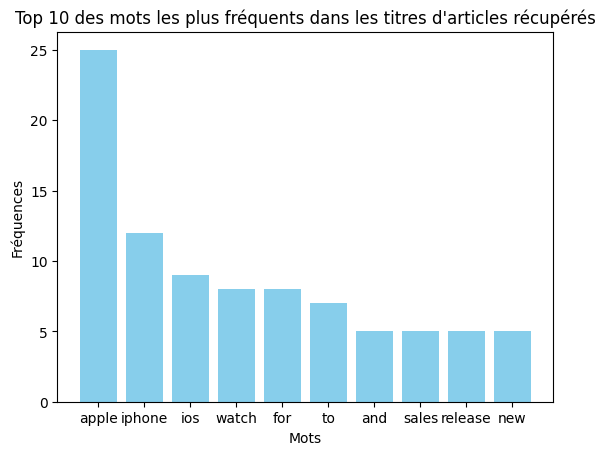

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

sorted_text_dictionary=sorted(combined_dict_text.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_text_dictionary]
values=[value for key, value in sorted_text_dictionary]
color = 'skyblue'

plt.bar(keys, values, color=color)
plt.title("Top 10 des mots les plus fréquents dans les titres d'articles récupérés")
plt.xlabel('Mots')
plt.ylabel('Fréquences')
plt.show()


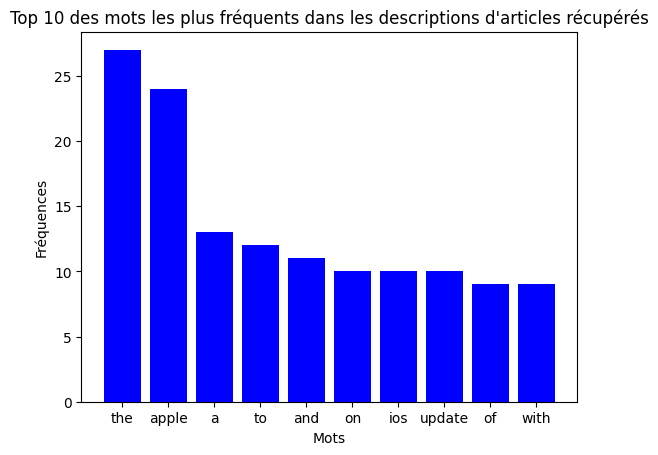

In [19]:

from collections import Counter

sorted_description_dictionary=sorted(combined_dict_description.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]

color='blue'

plt.bar(keys, values, color=color)
plt.title("Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés")
plt.xlabel('Mots')
plt.ylabel('Fréquences')
plt.show()

On observe aisément l'omniprésence de mots récurrents (stopwords) dans le corpus étudié. Nous allons donc les enlever et ensuite procéder à la deuxième étape de préparation du texte qui consistera en une lemmatisation et une analyse plus poussée.

In [20]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

df_analyse_1['Titre_cleaned_stopwords']=df_analyse_1['Titre_cleaned'].apply(clean_stopwords)
df_analyse_1['Description_cleaned_stopwords']=df_analyse_1['Description_cleaned'].apply(clean_stopwords)

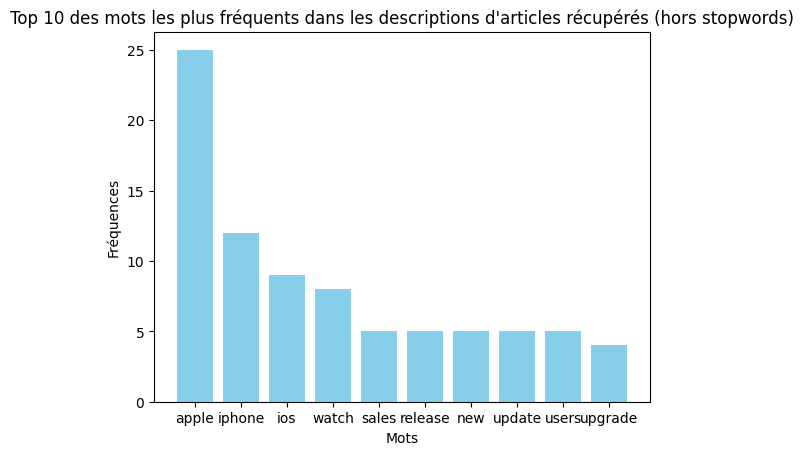

In [23]:
#Mots les plus fréquents après suppression des stopwords
df_analyse_1['Counting_Words_Text_nostopwords']=df_analyse_1['Titre_cleaned_stopwords'].apply(count_common_words)
df_analyse_1['Counting_Words_Descr_nostopwords']=df_analyse_1['Description_cleaned_stopwords'].apply(count_common_words)

combined_dict_text_bis=combine_dictionaries(df_analyse_1,'Counting_Words_Text_nostopwords')
sorted_description_dictionary=sorted(combined_dict_text_bis.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]


color='skyblue'

plt.bar(keys, values, color=color)
plt.title("Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés (hors stopwords)")
plt.xlabel('Mots')
plt.ylabel('Fréquences')
plt.show()

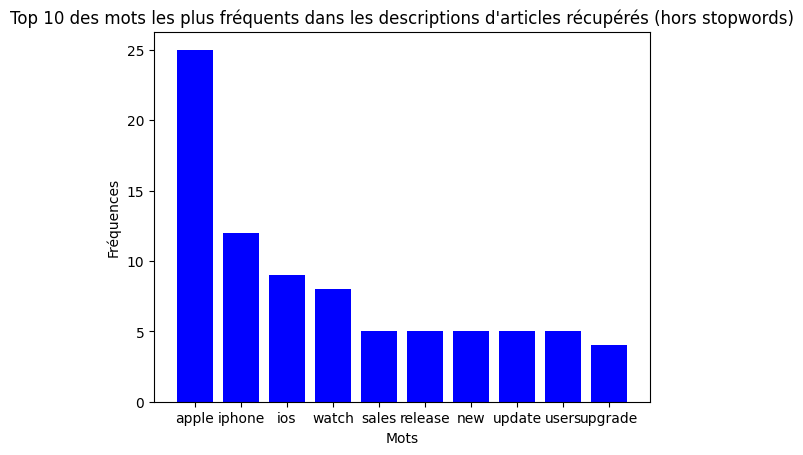

In [24]:
combined_dict_description_bis=combine_dictionaries(df_analyse_1,'Counting_Words_Text_nostopwords')
sorted_description_dictionary=sorted(combined_dict_description_bis.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]

color='blue'

plt.bar(keys, values, color=color)
plt.title("Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés (hors stopwords)")
plt.xlabel('Mots')
plt.ylabel('Fréquences')
plt.show()

# Préparation du texte en vue de l'analyse de sentiments (Nettoyage et analyse du contenu des articles)

Afin de pouvoir nettoyer efficacement le contenu HTML des articles de Forbes, nous avons dû inspecter certains des URLs pour comprendre la structure adoptée par le site. Les balises contenant le coeur de l'article ont été relevées. On récupère ce qu'elles contiennent avec la fonction ci-dessous:

In [25]:
#Mise en place de règles propres à chaque source de données pour récupérer les parties intéressantes

from bs4 import BeautifulSoup
#Fonction adaptée aux articles Forbes
def clean_html_1(text_html): 
    soup=BeautifulSoup(text_html, 'html.parser')
    title=soup.find_all('h1', class_=True)
    content=soup.find_all('p')
    united_content = ' '.join(el.get_text(strip=True) for el in title + content )
    return united_content


df_content=df.copy()
df_content['Cleaned_html_content'] = df_content.apply(lambda row: clean_html_1(row['Contenu']), axis=1)



In [26]:
df_content.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Cleaned_html_content
0,Apple Appeals As Watch Series 9 And Ultra 2 Sa...,https://www.forbes.com/sites/andrewwilliams/20...,2023-12-26 17:45:03+00:00,Apple has launched an appeal to get its Watch ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",11,25,12419,Apple Appeals As Watch Series 9 And Ultra 2 Sa...
1,Apple Watch Import Ban Starts Today—Here’s Wha...,https://www.forbes.com/sites/jamesfarrell/2023...,2023-12-26 17:09:29+00:00,Imports and sales of Apple Watches with blood ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",14,29,15342,Apple Watch Import Ban Starts Today—Here’s Wha...
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-25 21:26:53+00:00,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,20,13841,Apple iOS 17.3 Release Date: Awesome iPhone Up...
3,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-24 15:29:03+00:00,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",6,19,12942,Apple Faces MacBook Air Release Problem Update...
4,Setting Up A New Apple iPhone: The 7 Things Yo...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24 11:00:39+00:00,"So, you’ve just snagged a new iPhone? Congrats...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,28,13674,Setting Up A New Apple iPhone: The 7 Things Yo...


On applique à nouveau les étapes précédentes:

In [27]:
df_content['Content_cleaned']=df_content['Cleaned_html_content'].apply(cleaning_text)

In [28]:
df_content['Counting_Words']=df_content['Content_cleaned'].apply(count_common_words)
df_content['Most_common_text']=df_content['Counting_Words'].apply(most_common_words)

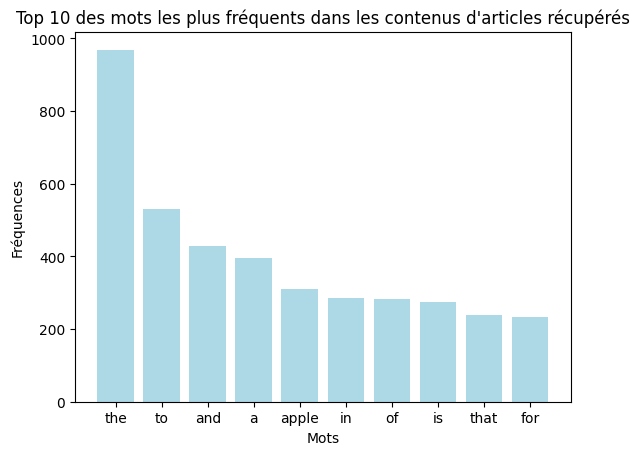

In [29]:
combined_dict_content=combine_dictionaries(df_content,'Most_common_text')
sorted_content_dictionary=sorted(combined_dict_content.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_content_dictionary]
values=[value for key, value in sorted_content_dictionary]

color='lightblue'

plt.bar(keys, values, color=color)
plt.title("Top 10 des mots les plus fréquents dans les contenus d'articles récupérés")
plt.xlabel('Mots')
plt.ylabel('Fréquences')
plt.show()

On voit clairement l'omniprésence des stopwords ici. Nous allons donc les supprimer

In [30]:
df_content['Content_cleaned_from_stopwords']=df_content['Content_cleaned'].apply(clean_stopwords)


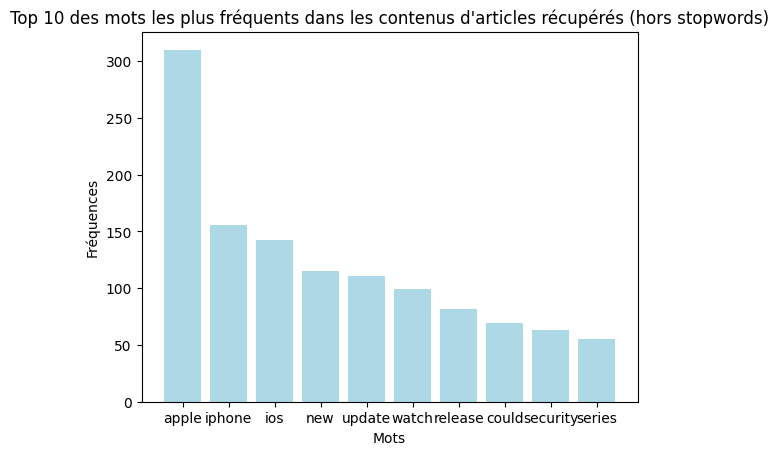

In [31]:
df_content['Counting_Words_bis']=df_content['Content_cleaned_from_stopwords'].apply(count_common_words)
df_content['Most_common_text_bis']=df_content['Counting_Words_bis'].apply(most_common_words)

combined_dict_content=combine_dictionaries(df_content,'Most_common_text_bis')
sorted_content_dictionary=sorted(combined_dict_content.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_content_dictionary]
values=[value for key, value in sorted_content_dictionary]

color='lightblue'

plt.bar(keys, values, color=color)
plt.title("Top 10 des mots les plus fréquents dans les contenus d'articles récupérés (hors stopwords)")
plt.xlabel('Mots')
plt.ylabel('Fréquences')
plt.show()


Logiquement, on retrouve des mots comme Apple, Iphone ou IOS dans les mots les plus fréquents, ce qui est forcément rassurant. Par ailleurs, les mots "update", "release" et "security" permettent d'ores et déjà de se faire une idée du contenu global des articles récupérés : on peut s'attendre à un nouveau produit de la part de Apple (en témoigne l'omniprésence de "new") mais aussi d'un potentiel problème ou renforcement de la sécurité.

In [32]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Prédiction des sentiments

Afin de pouvoir utiliser le modèle entraîné, il est nécessaire de pré-traiter les données pour les mettre dans le même format que lors de la phase d'entraînement.

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

In [34]:
#Préparation des données

n_words=10000
tokenizer=Tokenizer(num_words=n_words)
sequences = tokenizer.texts_to_sequences(df_content['Content_cleaned'])
padded_sequences = pad_sequences(sequences, maxlen=2209)

#Étape de prédiction
model = load_model('mon_modele_lstm.keras')
predictions = model.predict(padded_sequences)
predicted_labels = ['positif' if pred > 0.7 else 'neutre' if 0.3 < pred <= 0.7 else 'negatif' for pred in predictions]

for i, label in enumerate(predicted_labels):
    print(f"Article {i + 1}: Sentiment is {label}.")

1/1 [==============================] - 0s 428ms/step
Article 1: Sentiment is positif.
Article 2: Sentiment is positif.
Article 3: Sentiment is positif.
Article 4: Sentiment is positif.
Article 5: Sentiment is positif.
Article 6: Sentiment is positif.
Article 7: Sentiment is positif.
Article 8: Sentiment is positif.
Article 9: Sentiment is positif.
Article 10: Sentiment is positif.
Article 11: Sentiment is positif.
Article 12: Sentiment is positif.
Article 13: Sentiment is positif.
Article 14: Sentiment is positif.
Article 15: Sentiment is positif.
Article 16: Sentiment is positif.
Article 17: Sentiment is positif.
Article 18: Sentiment is positif.
Article 19: Sentiment is positif.
Article 20: Sentiment is positif.
Article 21: Sentiment is positif.
Article 22: Sentiment is positif.
Article 23: Sentiment is positif.
Article 24: Sentiment is positif.


In [35]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [36]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')
for i in range(len(df_analyse_1)):
    text = df_content.iloc[i,9]
    text = text[:512]
    sentiment = classifier(text)
    print(sentiment)


/Users/dabadieraphael/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'NEGATIVE', 'score': 0.9836570620536804}]
[{'label': 'NEGATIVE', 'score': 0.9983564019203186}]
[{'label': 'POSITIVE', 'score': 0.979047954082489}]
[{'label': 'NEGATIVE', 'score': 0.9210931658744812}]
[{'label': 'POSITIVE', 'score': 0.9992915391921997}]
[{'label': 'POSITIVE', 'score': 0.979047954082489}]
[{'label': 'NEGATIVE', 'score': 0.9210931658744812}]
[{'label': 'POSITIVE', 'score': 0.979047954082489}]
[{'label': 'NEGATIVE', 'score': 0.9956026077270508}]
[{'label': 'POSITIVE', 'score': 0.9707428216934204}]
[{'label': 'POSITIVE', 'score': 0.9418611526489258}]
[{'label': 'NEGATIVE', 'score': 0.8934594988822937}]
[{'label': 'NEGATIVE', 'score': 0.9956026077270508}]
[{'label': 'NEGATIVE', 'score': 0.9847583770751953}]
[{'label': 'NEGATIVE', 'score': 0.9994975328445435}]
[{'label': 'NEGATIVE', 'score': 0.9971733093261719}]
[{'label': 'NEGATIVE', 'score': 0.9972557425498962}]
[{'label': 'POSITIVE', 'score': 0.9708517789840698}]
[{'label': 'NEGATIVE', 'score': 0.999485254287719

Notre modèle de LSTM a ici très peu de résultats corrects. Le plus important dans notre cas est que la prédiction soit juste lorsque "positif" est renvoyé puisque nous voulons conseiller à l'utilisateur de n'acheter que si nous sommes confiants quant à nos prédictions.

In [37]:
true_positives = 0
false_positives = 0

for i in range(len(df_content)):
    #Prédiction de notre modèle LSTM
    lstm_pred = 'positif' if predictions[i] > 0.7 else 'negatif'
    
    # Prédiction du modèle pré-entrainé
    text = df_content.iloc[i, 9]  
    hf_pred = classifier(text[:512])[0]['label'].upper()  
    if lstm_pred == 'positif' and hf_pred == 'POSITIVE':
        true_positives += 1
    elif lstm_pred == 'positif' and hf_pred == 'NEGATIVE':
        false_positives += 1

print(f'True Positives: {true_positives}')
print(f'False Positives: {false_positives}')

True Positives: 10
False Positives: 14


Notre modèle de LSTM a ici très peu de résultats corrects. Le plus important dans notre cas est que la prédiction soit juste lorsque "positif" est renvoyé puisque nous voulons conseiller à l'utilisateur de n'acheter que si nous sommes confiants quant à nos prédictions.

In [38]:
true_positives = 0
false_positives = 0

for i in range(len(df_content)):
    #Prédiction de notre modèle LSTM
    lstm_pred = 'positif' if predictions[i] > 0.7 else 'negatif'
    
    # Prédiction du modèle pré-entrainé
    text = df_content.iloc[i, 9]  
    hf_pred = classifier(text[:512])[0]['label'].upper()  
    if lstm_pred == 'positif' and hf_pred == 'POSITIVE':
        true_positives += 1
    elif lstm_pred == 'positif' and hf_pred == 'NEGATIVE':
        false_positives += 1

print(f'True Positives: {true_positives}')
print(f'False Positives: {false_positives}')

True Positives: 10
False Positives: 14


Sur les 24 fois qu'on aurait recommandé à l'utilisateur d'acheter (en se basant sur les articles récupérés), on se serait trompé **plus de 50% du temps**.



On en conclut que ce modèle qui a été entraîné sur des critiques de film peine à généraliser à des articles de presse, ce à quoi on pouvait s'attendre. Dans la suite, nous allons utiliser le modèle pré-entrainé de la librairie transformers pour faire de la prédiction de sentiments sur les articles de presse récupérés.